In [9]:
# 1. Cargar librerías
import pandas as pd
from pycaret.classification import *

# 2. Cargar datos
df = pd.read_csv('caso1_churn_clientes.csv')

# 3. Configuración del entorno
clf = setup(data=df,
            target='churn',
            session_id=123,
            normalize=True,
            categorical_features=['tipo_plan'])

# 4. Comparación de modelos para explorar
best_model = compare_models(sort='AUC')




,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(300, 7)"
4,Transformed data shape,"(300, 9)"
5,Transformed train set shape,"(210, 9)"
6,Transformed test set shape,"(90, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7286,0.6922,0.1133,0.3083,0.1613,0.0777,0.0902,0.0120
lda,Linear Discriminant Analysis,0.7286,0.6922,0.2033,0.3967,0.2620,0.1392,0.1480,0.0180
lr,Logistic Regression,0.7286,0.6846,0.1833,0.4300,0.2453,0.1276,0.1470,0.5390
nb,Naive Bayes,0.7000,0.6753,0.3500,0.4710,0.3839,0.1932,0.2060,0.0150
ada,Ada Boost Classifier,0.6905,0.6517,0.2267,0.3117,0.2530,0.0918,0.0912,0.0330
gbc,Gradient Boosting Classifier,0.6857,0.6312,0.2433,0.3917,0.2659,0.0877,0.1076,0.0390
qda,Quadratic Discriminant Analysis,0.6714,0.6144,0.3467,0.3583,0.3459,0.1302,0.1315,0.0150
rf,Random Forest Classifier,0.6952,0.6132,0.1500,0.2733,0.1808,0.0373,0.0376,0.0520
lightgbm,Light Gradient Boosting Machine,0.6952,0.5986,0.2833,0.3731,0.3056,0.1365,0.1453,0.0650
svm,SVM - Linear Kernel,0.5714,0.5788,0.3433,0.2597,0.2759,-0.0043,-0.0036,0.0130


In [10]:
# 5. Crear modelo con mejor balance
nb_model = create_model('nb')

# 6. Ajustar hiperparámetros
tuned_nb = tune_model(nb_model)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.7875,0.4000,0.6667,0.5000,0.3913,0.4108
1,0.6190,0.6875,0.4000,0.2857,0.3333,0.0769,0.0791
2,0.7143,0.7750,0.4000,0.4000,0.4000,0.2125,0.2125
3,0.8095,0.6750,0.4000,0.6667,0.5000,0.3913,0.4108
4,0.8571,0.8500,0.4000,1.0000,0.5714,0.5039,0.5804
5,0.6667,0.6222,0.5000,0.4286,0.4615,0.2222,0.2236
6,0.6667,0.6889,0.1667,0.3333,0.2222,0.0392,0.0430
7,0.6667,0.6111,0.1667,0.3333,0.2222,0.0392,0.0430
8,0.5238,0.5333,0.1667,0.1667,0.1667,-0.1667,-0.1667


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8125,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7619,0.6750,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7619,0.8000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7619,0.6750,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7619,0.8500,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7143,0.6444,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7143,0.6889,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6667,0.6333,0.0000,0.0000,0.0000,-0.0889,-0.1414
8,0.6667,0.5111,0.0000,0.0000,0.0000,-0.0889,-0.1414


Fitting 10 folds for each of 10 candidates, totalling 100 fits


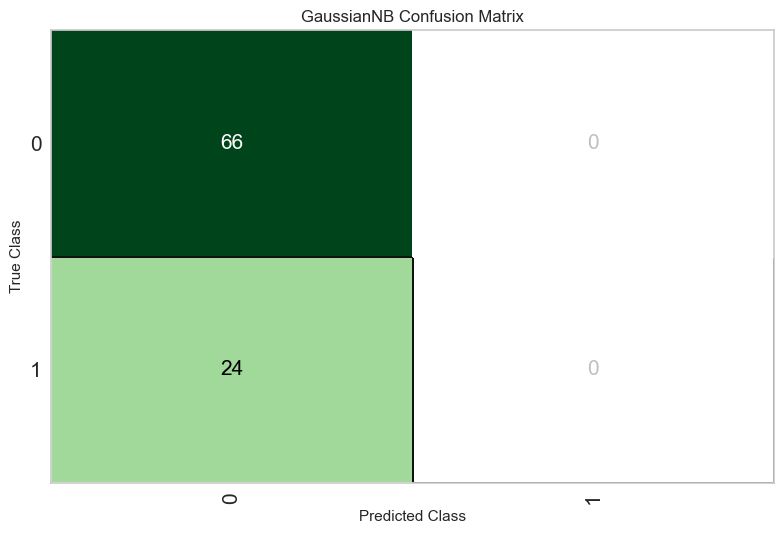

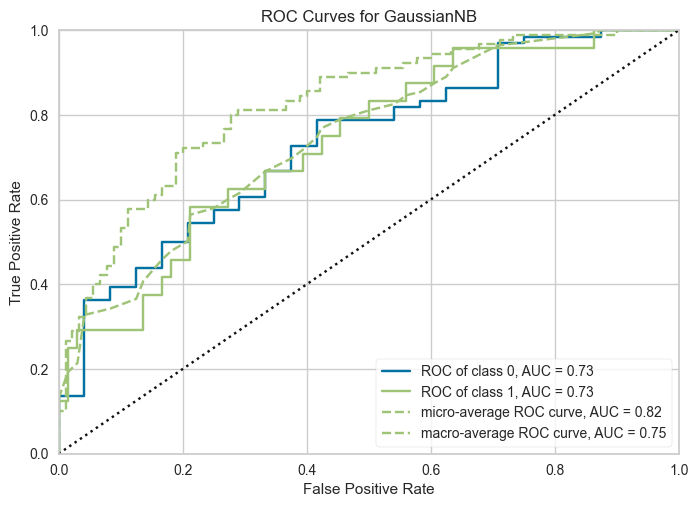

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
# 7. Interpretación y visualización
plot_model(tuned_nb, plot='confusion_matrix')
plot_model(tuned_nb, plot='auc')


# 8. Evaluación interactiva
evaluate_model(tuned_nb)




In [12]:
# 9. Predicciones
predicciones = predict_model(tuned_nb)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7333,0.7342,0.0000,0.0000,0.0000,0.0000,0.0000


In [13]:
# 10. Guardar modelo final para uso futuro
save_model(tuned_nb, 'modelo_churn_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'meses_como_cliente',
                                              'frecuencia_uso',
                                              'soporte_llamadas',
                                              'usa_app_movil'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Tra...
                                     tra